# Data Preparation and Cleaning Lab

Given a dataset with Air Quality for London based on various species.

Courtesy : https://www.londonair.org.uk/london/asp/datasite.asp?CBXSpecies2=NOm&CBXSpecies3=NO2m&CBXSpecies4=NOXm&CBXSpecies5=O3m&CBXSpecies6=PM10m&day1=1&month1=jan&year1=2018&day2=1&month2=jan&year2=2019&period=hourly&ratidate=&site=BL0&res=6&Submit=Replot+graph

Based on the dataset, you are required to do the following:

1. Clean/handle missing values
2. Detect and remove outliers in the data
3. Remove skewness in data

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns

air_data = pd.read_csv('../../../data/LaqnData.csv')
air_data.head()

#Write your code below

Site Species   ReadingDateTime  Value   Units Provisional or Ratified
0  BL0      NO  01/01/2018 00:00    2.5  ug m-3                       R
1  BL0      NO  01/01/2018 01:00    1.9  ug m-3                       R
2  BL0      NO  01/01/2018 02:00    1.8  ug m-3                       R
3  BL0      NO  01/01/2018 03:00    0.9  ug m-3                       R
4  BL0      NO  01/01/2018 04:00    0.9  ug m-3                       R

In [3]:
air_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 0 to 43799
Data columns (total 6 columns):
Site                       43800 non-null object
Species                    43800 non-null object
ReadingDateTime            43800 non-null object
Value                      36287 non-null float64
Units                      43800 non-null object
Provisional or Ratified    43800 non-null object
dtypes: float64(1), object(5)
memory usage: 2.0+ MB


In [4]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns


In [5]:
missing_values_table(air_data)

Your selected dataframe has 6 columns.
There are 1 columns that have missing values.


Missing Values  % of Total Values
Value            7513               17.2

In [6]:
air_data.Site.unique()

array(['BL0'], dtype=object)

In [7]:
air_data.Species.unique()

array(['NO', 'NO2', 'NOX', 'O3', 'PM10'], dtype=object)

In [8]:
air_data.Units.unique()

array(['ug m-3', 'ug m-3 as NO2', 'ug/m3'], dtype=object)

In [9]:
air_data['Provisional or Ratified'].unique()

array(['R', 'P'], dtype=object)

In [10]:
air_data.groupby('Species').describe()

Value                                                        
          count       mean        std  min   25%   50%   75%        max
Species                                                                
NO       8567.0  11.484230  18.802801  0.0   1.7   4.9  13.5  256.29999
NO2      8567.0  36.463254  18.385162  0.0  22.6  34.4  48.0  126.60000
NOX      2343.0  71.523261  42.649111  2.9  40.8  62.3  95.0  485.79999
O3       8535.0  35.084663  23.020574  0.0  17.8  33.5  48.5  143.89999
PM10     8275.0  17.570356  11.739188 -0.6  10.1  14.8  21.7  202.70000

In [11]:
air_data.groupby('Provisional or Ratified').describe()

Value                                               \
                           count       mean        std  min   25%   50%   75%   
Provisional or Ratified                                                         
P                        25871.0  24.899633  22.689978  0.0   8.0  18.8  36.7   
R                        10416.0  36.387193  31.392321 -0.6  13.9  29.2  49.7   

                                    
                               max  
Provisional or Ratified             
P                        485.79999  
R                        299.20001

In [8]:
air_data.groupby(['Species','Provisional or Ratified']).describe()

Value                                     \
                                  count       mean        std   min    25%   
Species Provisional or Ratified                                              
NO      P                        6442.0   9.664871  18.915733   0.0   1.40   
        R                        2125.0  16.999671  17.329766   0.2   4.20   
NO2     P                        6442.0  33.692440  17.540913   0.0  20.50   
        R                        2125.0  44.863059  18.337805   1.9  31.60   
NOX     P                         218.0  77.303211  48.548131  11.7  49.95   
        R                        2125.0  70.930306  41.964984   2.9  40.40   
O3      P                        6409.0  37.201592  24.119185   0.0  19.40   
        R                        2126.0  28.703010  17.882023   0.1  14.30   
PM10    P                        6360.0  17.231682  11.611727   0.0  10.00   
        R                        1915.0  18.695144  12.088095  -0.6  10.70   

                                                          
                                  50%     75%        max  
Species Provisional or Ratified                           
NO      P                         3.7  10.000  256.29999  
        R                        11.6  24.100  124.00000  
NO2     P                        31.7  44.600  126.60000  
        R                        44.2  56.800  125.00000  
NOX     P                        68.4  97.775  485.79999  
        R                        61.6  94.900  299.20001  
O3      P                        35.5  51.500  143.89999  
        R                        27.8  42.175   79.70000  
PM10    P                        14.5  21.100  202.70000  
        R                        16.0  24.050   92.10000

In [9]:
air_data.groupby(['Species','Provisional or Ratified']).describe().columns

MultiIndex(levels=[['Value'], ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 2, 3, 4, 5, 6, 7]])

In [11]:
air_data.groupby(['Species','Provisional or Ratified']).describe().index

MultiIndex(levels=[['NO', 'NO2', 'NOX', 'O3', 'PM10'], ['P', 'R']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3, 4, 4], [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]],
           names=['Species', 'Provisional or Ratified'])

In [41]:
air_data[air_data['Value'].isna()]

Site Species     ReadingDateTime  Value   Units Provisional or Ratified
63     BL0      NO 2018-03-01 15:00:00    NaN  ug m-3                       R
206    BL0      NO 2018-09-01 14:00:00    NaN  ug m-3                       R
516    BL0      NO 2018-01-22 12:00:00    NaN  ug m-3                       R
517    BL0      NO 2018-01-22 13:00:00    NaN  ug m-3                       R
518    BL0      NO 2018-01-22 14:00:00    NaN  ug m-3                       R
519    BL0      NO 2018-01-22 15:00:00    NaN  ug m-3                       R
735    BL0      NO 2018-01-31 15:00:00    NaN  ug m-3                       R
1355   BL0      NO 2018-02-26 11:00:00    NaN  ug m-3                       R
1356   BL0      NO 2018-02-26 12:00:00    NaN  ug m-3                       R
1357   BL0      NO 2018-02-26 13:00:00    NaN  ug m-3                       R
1358   BL0      NO 2018-02-26 14:00:00    NaN  ug m-3                       R
1359   BL0      NO 2018-02-26 15:00:00    NaN  ug m-3                       R
1360   BL0      NO 2018-02-26 16:00:00    NaN  ug m-3                       R
1361   BL0      NO 2018-02-26 17:00:00    NaN  ug m-3                       R
1362   BL0      NO 2018-02-26 18:00:00    NaN  ug m-3                       R
1363   BL0      NO 2018-02-26 19:00:00    NaN  ug m-3                       R
1364   BL0      NO 2018-02-26 20:00:00    NaN  ug m-3                       R
1365   BL0      NO 2018-02-26 21:00:00    NaN  ug m-3                       R
1366   BL0      NO 2018-02-26 22:00:00    NaN  ug m-3                       R
1367   BL0      NO 2018-02-26 23:00:00    NaN  ug m-3                       R
1368   BL0      NO 2018-02-27 00:00:00    NaN  ug m-3                       R
1369   BL0      NO 2018-02-27 01:00:00    NaN  ug m-3                       R
1370   BL0      NO 2018-02-27 02:00:00    NaN  ug m-3                       R
1371   BL0      NO 2018-02-27 03:00:00    NaN  ug m-3                       R
1372   BL0      NO 2018-02-27 04:00:00    NaN  ug m-3                       R
1373   BL0      NO 2018-02-27 05:00:00    NaN  ug m-3                       R
1374   BL0      NO 2018-02-27 06:00:00    NaN  ug m-3                       R
1375   BL0      NO 2018-02-27 07:00:00    NaN  ug m-3                       R
1376   BL0      NO 2018-02-27 08:00:00    NaN  ug m-3                       R
1377   BL0      NO 2018-02-27 09:00:00    NaN  ug m-3                       R
...    ...     ...                 ...    ...     ...                     ...
43031  BL0    PM10 2018-11-29 23:00:00    NaN   ug/m3                       P
43032  BL0    PM10 2018-11-30 00:00:00    NaN   ug/m3                       P
43033  BL0    PM10 2018-11-30 01:00:00    NaN   ug/m3                       P
43120  BL0    PM10 2018-03-12 16:00:00    NaN   ug/m3                       P
43121  BL0    PM10 2018-03-12 17:00:00    NaN   ug/m3                       P
43122  BL0    PM10 2018-03-12 18:00:00    NaN   ug/m3                       P
43123  BL0    PM10 2018-03-12 19:00:00    NaN   ug/m3                       P
43124  BL0    PM10 2018-03-12 20:00:00    NaN   ug/m3                       P
43125  BL0    PM10 2018-03-12 21:00:00    NaN   ug/m3                       P
43126  BL0    PM10 2018-03-12 22:00:00    NaN   ug/m3                       P
43127  BL0    PM10 2018-03-12 23:00:00    NaN   ug/m3                       P
43128  BL0    PM10 2018-04-12 00:00:00    NaN   ug/m3                       P
43129  BL0    PM10 2018-04-12 01:00:00    NaN   ug/m3                       P
43130  BL0    PM10 2018-04-12 02:00:00    NaN   ug/m3                       P
43131  BL0    PM10 2018-04-12 03:00:00    NaN   ug/m3                       P
43132  BL0    PM10 2018-04-12 04:00:00    NaN   ug/m3                       P
43133  BL0    PM10 2018-04-12 05:00:00    NaN   ug/m3                       P
43134  BL0    PM10 2018-04-12 06:00:00    NaN   ug/m3                       P
43135  BL0    PM10 2018-04-12 07:00:00    NaN   ug/m3                       P
43136  BL0    PM10 2018-04-1

In [63]:
t0 = air_data.ReadingDateTime[63].split()[1]
air_data[air_data.ReadingDateTime.str.contains(t0) & (air_data['Species']=='NO') & (air_data['Provisional or Ratified']=='P')]

Site Species   ReadingDateTime      Value   Units Provisional or Ratified
2160  BL0      NO  01/04/2018 00:00   13.00000  ug m-3                       P
2184  BL0      NO  02/04/2018 00:00   20.50000  ug m-3                       P
2208  BL0      NO  03/04/2018 00:00    0.20000  ug m-3                       P
2232  BL0      NO  04/04/2018 00:00    0.60000  ug m-3                       P
2256  BL0      NO  05/04/2018 00:00   12.10000  ug m-3                       P
2280  BL0      NO  06/04/2018 00:00    1.00000  ug m-3                       P
2304  BL0      NO  07/04/2018 00:00    2.00000  ug m-3                       P
2328  BL0      NO  08/04/2018 00:00    0.20000  ug m-3                       P
2352  BL0      NO  09/04/2018 00:00    3.60000  ug m-3                       P
2376  BL0      NO  10/04/2018 00:00    9.20000  ug m-3                       P
2400  BL0      NO  11/04/2018 00:00   10.20000  ug m-3                       P
2424  BL0      NO  12/04/2018 00:00    7.10000  ug m-3                       P
2448  BL0      NO  13/04/2018 00:00    5.00000  ug m-3                       P
2472  BL0      NO  14/04/2018 00:00    1.10000  ug m-3                       P
2496  BL0      NO  15/04/2018 00:00   17.00000  ug m-3                       P
2520  BL0      NO  16/04/2018 00:00    0.20000  ug m-3                       P
2544  BL0      NO  17/04/2018 00:00    0.40000  ug m-3                       P
2568  BL0      NO  18/04/2018 00:00    0.10000  ug m-3                       P
2592  BL0      NO  19/04/2018 00:00   16.50000  ug m-3                       P
2616  BL0      NO  20/04/2018 00:00    0.10000  ug m-3                       P
2640  BL0      NO  21/04/2018 00:00    5.90000  ug m-3                       P
2664  BL0      NO  22/04/2018 00:00    1.20000  ug m-3                       P
2688  BL0      NO  23/04/2018 00:00    1.70000  ug m-3                       P
2712  BL0      NO  24/04/2018 00:00    0.10000  ug m-3                       P
2736  BL0      NO  25/04/2018 00:00    5.60000  ug m-3                       P
2760  BL0      NO  26/04/2018 00:00    0.40000  ug m-3                       P
2784  BL0      NO  27/04/2018 00:00    0.40000  ug m-3                       P
2808  BL0      NO  28/04/2018 00:00    4.10000  ug m-3                       P
2832  BL0      NO  29/04/2018 00:00    4.10000  ug m-3                       P
2856  BL0      NO  30/04/2018 00:00    2.20000  ug m-3                       P
...   ...     ...               ...        ...     ...                     ...
8040  BL0      NO  02/12/2018 00:00    1.90000  ug m-3                       P
8064  BL0      NO  03/12/2018 00:00    0.60000  ug m-3                       P
8088  BL0      NO  04/12/2018 00:00        NaN  ug m-3                       P
8112  BL0      NO  05/12/2018 00:00    6.60000  ug m-3                       P
8136  BL0      NO  06/12/2018 00:00    1.50000  ug m-3                       P
8160  BL0      NO  07/12/2018 00:00    1.00000  ug m-3                       P
8184  BL0      NO  08/12/2018 00:00    1.40000  ug m-3                       P
8208  BL0      NO  09/12/2018 00:00    1.40000  ug m-3                       P
8232  BL0      NO  10/12/2018 00:00    3.50000  ug m-3                       P
8256  BL0      NO  11/12/2018 00:00   29.10000  ug m-3                       P
8280  BL0      NO  12/12/2018 00:00    4.50000  ug m-3                       P
8304  BL0      NO  13/12/2018 00:00   25.80000  ug m-3                       P
8328  BL0      NO  14/12/2018 00:00   20.00000  ug m-3                       P
8352  BL0      NO  15/12/2018 00:00    7.20000  ug m-3                       P
8376  BL0      NO  16/12/2018 00:00    1.60000  ug m-3                       P
8400  BL0      NO  17/12/2018 00:00    3.00000  ug m-3                       P
8424  BL0      NO  18/12/2018 00:00    1.00000  ug m-3                       P
8448  BL0      NO  19/12/2018 00:00    1.50000  ug m-3                       P
8472  BL0      NO  20/12/2018 00:00    1.20000  ug m-3 

In [12]:
type(air_data.ReadingDateTime[0])

str

In [13]:
air_data['ReadingDateTime'] = pd.to_datetime(air_data['ReadingDateTime'])
type(air_data.ReadingDateTime[0])

pandas._libs.tslibs.timestamps.Timestamp

In [14]:
air_data.head()

Site Species     ReadingDateTime  Value   Units Provisional or Ratified
0  BL0      NO 2018-01-01 00:00:00    2.5  ug m-3                       R
1  BL0      NO 2018-01-01 01:00:00    1.9  ug m-3                       R
2  BL0      NO 2018-01-01 02:00:00    1.8  ug m-3                       R
3  BL0      NO 2018-01-01 03:00:00    0.9  ug m-3                       R
4  BL0      NO 2018-01-01 04:00:00    0.9  ug m-3                       R

In [15]:
air_data[air_data['Species']=='NO']

Site Species     ReadingDateTime  Value   Units Provisional or Ratified
0     BL0      NO 2018-01-01 00:00:00    2.5  ug m-3                       R
1     BL0      NO 2018-01-01 01:00:00    1.9  ug m-3                       R
2     BL0      NO 2018-01-01 02:00:00    1.8  ug m-3                       R
3     BL0      NO 2018-01-01 03:00:00    0.9  ug m-3                       R
4     BL0      NO 2018-01-01 04:00:00    0.9  ug m-3                       R
5     BL0      NO 2018-01-01 05:00:00    0.5  ug m-3                       R
6     BL0      NO 2018-01-01 06:00:00    0.5  ug m-3                       R
7     BL0      NO 2018-01-01 07:00:00    0.9  ug m-3                       R
8     BL0      NO 2018-01-01 08:00:00    1.2  ug m-3                       R
9     BL0      NO 2018-01-01 09:00:00    3.1  ug m-3                       R
10    BL0      NO 2018-01-01 10:00:00    5.0  ug m-3                       R
11    BL0      NO 2018-01-01 11:00:00    3.0  ug m-3                       R
12    BL0      NO 2018-01-01 12:00:00    6.6  ug m-3                       R
13    BL0      NO 2018-01-01 13:00:00   33.3  ug m-3                       R
14    BL0      NO 2018-01-01 14:00:00   42.2  ug m-3                       R
15    BL0      NO 2018-01-01 15:00:00   35.8  ug m-3                       R
16    BL0      NO 2018-01-01 16:00:00   49.1  ug m-3                       R
17    BL0      NO 2018-01-01 17:00:00   14.9  ug m-3                       R
18    BL0      NO 2018-01-01 18:00:00   13.2  ug m-3                       R
19    BL0      NO 2018-01-01 19:00:00   35.6  ug m-3                       R
20    BL0      NO 2018-01-01 20:00:00   31.7  ug m-3                       R
21    BL0      NO 2018-01-01 21:00:00   40.6  ug m-3                       R
22    BL0      NO 2018-01-01 22:00:00   37.4  ug m-3                       R
23    BL0      NO 2018-01-01 23:00:00   33.5  ug m-3                       R
24    BL0      NO 2018-02-01 00:00:00    8.8  ug m-3                       R
25    BL0      NO 2018-02-01 01:00:00    5.0  ug m-3                       R
26    BL0      NO 2018-02-01 02:00:00    2.1  ug m-3                       R
27    BL0      NO 2018-02-01 03:00:00    4.5  ug m-3                       R
28    BL0      NO 2018-02-01 04:00:00    3.3  ug m-3                       R
29    BL0      NO 2018-02-01 05:00:00    2.4  ug m-3                       R
...   ...     ...                 ...    ...     ...                     ...
8730  BL0      NO 2018-12-30 18:00:00   15.6  ug m-3                       P
8731  BL0      NO 2018-12-30 19:00:00   15.7  ug m-3                       P
8732  BL0      NO 2018-12-30 20:00:00   13.6  ug m-3                       P
8733  BL0      NO 2018-12-30 21:00:00   14.7  ug m-3                       P
8734  BL0      NO 2018-12-30 22:00:00   13.5  ug m-3                       P
8735  BL0      NO 2018-12-30 23:00:00    2.0  ug m-3                       P
8736  BL0      NO 2018-12-31 00:00:00    4.0  ug m-3                       P
8737  BL0      NO 2018-12-31 01:00:00    2.7  ug m-3                       P
8738  BL0      NO 2018-12-31 02:00:00    1.7  ug m-3                       P
8739  BL0      NO 2018-12-31 03:00:00    1.2  ug m-3                       P
8740  BL0      NO 2018-12-31 04:00:00    1.0  ug m-3                       P
8741  BL0      NO 2018-12-31 05:00:00    1.5  ug m-3                       P
8742  BL0      NO 2018-12-31 06:00:00    9.1  ug m-3                       P
8743  BL0      NO 2018-12-31 07:00:00    6.7  ug m-3                       P
8744  BL0      NO 2018-12-31 08:00:00   13.2  ug m-3                       P
8745  BL0      NO 2018-12-31 09:00:00   14.7  ug m-3                       P
8746  BL0      NO 2018-12-31 10:00:00    5.6  ug m-3                       P
8747  BL0      NO 2018-12-31 11:00:00    8.4  ug m-3                       P
8748  BL0      NO 2018-12-31 12:00:00   16.7  ug m-3                       P
8749  BL0      NO 2018-12-31 13:00:00    8.7  ug m-3                       P
8

In [48]:
air_data[1350:1360]

Site Species     ReadingDateTime  Value   Units Provisional or Ratified
1350  BL0      NO 2018-02-26 06:00:00    9.8  ug m-3                       R
1351  BL0      NO 2018-02-26 07:00:00   14.5  ug m-3                       R
1352  BL0      NO 2018-02-26 08:00:00   21.3  ug m-3                       R
1353  BL0      NO 2018-02-26 09:00:00   25.0  ug m-3                       R
1354  BL0      NO 2018-02-26 10:00:00   24.6  ug m-3                       R
1355  BL0      NO 2018-02-26 11:00:00    NaN  ug m-3                       R
1356  BL0      NO 2018-02-26 12:00:00    NaN  ug m-3                       R
1357  BL0      NO 2018-02-26 13:00:00    NaN  ug m-3                       R
1358  BL0      NO 2018-02-26 14:00:00    NaN  ug m-3                       R
1359  BL0      NO 2018-02-26 15:00:00    NaN  ug m-3                       R

In [49]:
air_data[air_data.ReadingDateTime.str.contains('06:00:00')]

AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas

In [24]:
NO_P = air_data[(air_data['Species']=='NO') & (air_data['Provisional or Ratified']=='P')].sort_values(by=['ReadingDateTime'])
print(NO_P.describe())
NO_P.info()

             Value
count  6442.000000
mean      9.664871
std      18.915733
min       0.000000
25%       1.400000
50%       3.700000
75%      10.000000
max     256.299990
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6600 entries, 2160 to 8759
Data columns (total 6 columns):
Site                       6600 non-null object
Species                    6600 non-null object
ReadingDateTime            6600 non-null datetime64[ns]
Value                      6442 non-null float64
Units                      6600 non-null object
Provisional or Ratified    6600 non-null object
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 360.9+ KB


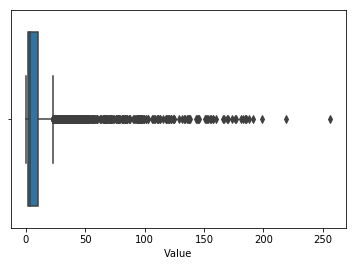

In [19]:
sns.boxplot(x=NO_P['Value'])

In [36]:
from scipy import stats

NO_P_Value = pd.DataFrame(NO_P.Value)
z = np.abs(stats.zscore(NO_P_Value.dropna()))
print(z)

[[ 0.17632876]
 [ 0.06530145]
 [ 0.00871676]
 ..., 
 [ 0.01400378]
 [ 0.093309  ]
 [ 0.01771831]]


In [33]:
stats.zscore(NO_P_Value)

array([[ nan],
       [ nan],
       [ nan],
       ..., 
       [ nan],
       [ nan],
       [ nan]])

In [34]:
NO_P_Value

Value
2160   13.0
2161   10.9
2162    9.5
2163    9.4
2164    7.7
2165   10.5
2166    7.6
2167   19.0
2168   15.7
2169   17.7
2170   12.2
2171   11.8
2172    8.1
2173    8.9
2174    9.4
2175    8.5
2176   10.5
2177    4.7
2178    3.6
2179   10.7
2180    6.6
2181    1.1
2182    0.9
2183    8.1
2880   51.3
2881   43.2
2882   26.7
2883   16.3
2884    2.6
2885    8.0
...     ...
8730   15.6
8731   15.7
8732   13.6
8733   14.7
8734   13.5
8735    2.0
8736    4.0
8737    2.7
8738    1.7
8739    1.2
8740    1.0
8741    1.5
8742    9.1
8743    6.7
8744   13.2
8745   14.7
8746    5.6
8747    8.4
8748   16.7
8749    8.7
8750   10.4
8751    5.4
8752   14.7
8753   12.6
8754   11.1
8755   10.4
8756   11.4
8757    9.4
8758    7.9
8759   10.0

[6600 rows x 1 columns]

In [31]:
pd.DataFrame(NO_P.Value)

Value
2160   13.0
2161   10.9
2162    9.5
2163    9.4
2164    7.7
2165   10.5
2166    7.6
2167   19.0
2168   15.7
2169   17.7
2170   12.2
2171   11.8
2172    8.1
2173    8.9
2174    9.4
2175    8.5
2176   10.5
2177    4.7
2178    3.6
2179   10.7
2180    6.6
2181    1.1
2182    0.9
2183    8.1
2880   51.3
2881   43.2
2882   26.7
2883   16.3
2884    2.6
2885    8.0
...     ...
8730   15.6
8731   15.7
8732   13.6
8733   14.7
8734   13.5
8735    2.0
8736    4.0
8737    2.7
8738    1.7
8739    1.2
8740    1.0
8741    1.5
8742    9.1
8743    6.7
8744   13.2
8745   14.7
8746    5.6
8747    8.4
8748   16.7
8749    8.7
8750   10.4
8751    5.4
8752   14.7
8753   12.6
8754   11.1
8755   10.4
8756   11.4
8757    9.4
8758    7.9
8759   10.0

[6600 rows x 1 columns]

In [20]:
NO_R = air_data[(air_data['Species']=='NO') & (air_data['Provisional or Ratified']=='R')].sort_values(by=['ReadingDateTime'])
print(NO_R.describe())
NO_R.info()

             Value
count  2125.000000
mean     16.999671
std      17.329766
min       0.200000
25%       4.200000
50%      11.600000
75%      24.100000
max     124.000000
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2160 entries, 0 to 1703
Data columns (total 6 columns):
Site                       2160 non-null object
Species                    2160 non-null object
ReadingDateTime            2160 non-null datetime64[ns]
Value                      2125 non-null float64
Units                      2160 non-null object
Provisional or Ratified    2160 non-null object
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 118.1+ KB


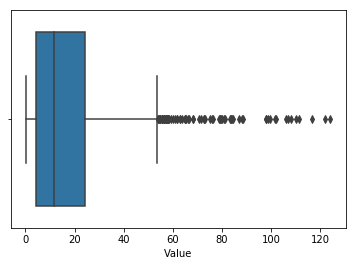

In [21]:
sns.boxplot(x=NO_R['Value'])

In [19]:
import plotly.plotly as ply
import plotly.offline as ofl
import plotly.graph_objs as go
ofl.init_notebook_mode()

trace_NO = go.Scatter(
    x=air_data[air_data['Species']=='NO'].sort_values(by=['ReadingDateTime']).ReadingDateTime,
    y=air_data[air_data['Species']=='NO'].Value,
    name = "NO",
    mode='markers + lines',
    marker=dict(
        color='rgb(181,6,6)',
        size=6,
        symbol='circle',
        line=dict(
            color='rgb(181,6,6)',
            width=1
        ),
        opacity=0.9
    )
)

trace_NO2 = go.Scatter(
    x=air_data[air_data['Species']=='NO2'].sort_values(by=['ReadingDateTime']).ReadingDateTime,
    y=air_data[air_data['Species']=='NO2'].Value,
    name = "NO2",
    mode='markers + lines',
    marker=dict(
        color='rgb(252,217,68)',
        size=6,
        symbol='circle',
        line=dict(
            color='rgb(252,217,68)',
            width=1
        ),
        opacity=0.9
    )
)

trace_NOX = go.Scatter(
    x=air_data[air_data['Species']=='NOX'].sort_values(by=['ReadingDateTime']).ReadingDateTime,
    y=air_data[air_data['Species']=='NOX'].Value,
    name = "NOX",
    mode='markers + lines',
    marker=dict(
        color='rgb(12,109,99)',
        size=6,
        symbol='circle',
        line=dict(
            color='rgb(12,109,99)',
            width=1
        ),
        opacity=0.9
    )
)

trace_O3 = go.Scatter(
    x=air_data[air_data['Species']=='O3'].sort_values(by=['ReadingDateTime']).ReadingDateTime,
    y=air_data[air_data['Species']=='O3'].Value,
    name = "O3",
    mode='markers + lines',
    marker=dict(
        color='rgb(11,42,117)',
        size=6,
        symbol='circle',
        line=dict(
            color='rgb(11,42,117)',
            width=1
        ),
        opacity=0.9
    )
)

trace_PM10 = go.Scatter(
    x=air_data[air_data['Species']=='PM10'].sort_values(by=['ReadingDateTime']).ReadingDateTime,
    y=air_data[air_data['Species']=='PM10'].Value,
    name = "PM10",
    mode='markers + lines',
    marker=dict(
        color='rgb(87,46,138)',
        size=6,
        symbol='circle',
        line=dict(
            color='rgb(87,46,138)',
            width=1
        ),
        opacity=0.9
    )
)

data = [trace_NO, trace_NO2, trace_NOX, trace_O3, trace_PM10]

# Customizing the layout
layout = go.Layout(
    width=800,
    height=900,
    autosize=False,
    margin=dict(t=10, b=0, l=0, r=0),
)

# This 'updatemenus' block of code creates and customizes the buttons we would want to create for the user on the visualization
updatemenus=list([
    dict(
        # buttons to be created
        buttons=list([   
            dict(
                args=[{'visible':[True, False, False, False, False]},{'title':'NO'}],
                label='NO',
                method='update'
            ),
            dict(
                args=[{'visible':[False, True, False, False, False]},{'title':'NO2'}],
                label='NO2',
                method='update'
            ),
            dict(
                args=[{'visible':[False, False, True, False, False]},{'title':'NOX'}],
                label='NOX',
                method='update'
            ),
            dict(
                args=[{'visible':[False, False, False, True, False]},{'title':'O3'}],
                label='O3',
                method='update'
            ),
            dict(
                args=[{'visible':[False, False, False, False, True]},{'title':'PM10'}],
                label='PM10',
                method='update'
            )
        ]),
        # alignment and positioning of the buttons
        direction = 'left',
        pad = {'r': 10, 't': 10},
        showactive = True,
        type = 'buttons',
        x = 0.1,
        xanchor = 'left',
        y = 1.1,
        yanchor = 'top' 
    ),
])

# This is the annotation to accompany the customized buttons. The annotation shows up on the layout
annotations = list([
    dict(text='Pick Type:', x=0, y=1.085, yref='paper', align='left', showarrow=False)
])

# Adding the updatemenus block with custom buttons and the annotations to the layout
layout['updatemenus'] = updatemenus
layout['annotations'] = annotations

# Creating a figure using data and layout
fig = dict(data=data)

# Visualizing the plot
ofl.iplot(fig, filename='AirData')

In [16]:
air_data.groupby('Species').head()

Site Species     ReadingDateTime  Value          Units  \
0      BL0      NO 2018-01-01 00:00:00    2.5         ug m-3   
1      BL0      NO 2018-01-01 01:00:00    1.9         ug m-3   
2      BL0      NO 2018-01-01 02:00:00    1.8         ug m-3   
3      BL0      NO 2018-01-01 03:00:00    0.9         ug m-3   
4      BL0      NO 2018-01-01 04:00:00    0.9         ug m-3   
8760   BL0     NO2 2018-01-01 00:00:00   14.6         ug m-3   
8761   BL0     NO2 2018-01-01 01:00:00   17.3         ug m-3   
8762   BL0     NO2 2018-01-01 02:00:00   17.5         ug m-3   
8763   BL0     NO2 2018-01-01 03:00:00   17.3         ug m-3   
8764   BL0     NO2 2018-01-01 04:00:00   12.9         ug m-3   
17520  BL0     NOX 2018-01-01 00:00:00   18.5  ug m-3 as NO2   
17521  BL0     NOX 2018-01-01 01:00:00   20.2  ug m-3 as NO2   
17522  BL0     NOX 2018-01-01 02:00:00   20.3  ug m-3 as NO2   
17523  BL0     NOX 2018-01-01 03:00:00   18.7  ug m-3 as NO2   
17524  BL0     NOX 2018-01-01 04:00:00   14.3  ug m-3 as NO2   
26280  BL0      O3 2018-01-01 00:00:00   59.8         ug m-3   
26281  BL0      O3 2018-01-01 01:00:00   53.6         ug m-3   
26282  BL0      O3 2018-01-01 02:00:00   54.5         ug m-3   
26283  BL0      O3 2018-01-01 03:00:00   57.5         ug m-3   
26284  BL0      O3 2018-01-01 04:00:00   60.9         ug m-3   
35040  BL0    PM10 2018-01-01 00:00:00   11.4          ug/m3   
35041  BL0    PM10 2018-01-01 01:00:00    8.9          ug/m3   
35042  BL0    PM10 2018-01-01 02:00:00    6.9          ug/m3   
35043  BL0    PM10 2018-01-01 03:00:00    5.6          ug/m3   
35044  BL0    PM10 2018-01-01 04:00:00    1.4          ug/m3   

      Provisional or Ratified  
0                           R  
1                           R  
2                           R  
3                           R  
4                           R  
8760                        R  
8761                        R  
8762                        R  
8763                        R  
8764                        R  
17520                       R  
17521                       R  
17522                       R  
17523                       R  
17524                       R  
26280                       R  
26281                       R  
26282                       R  
26283                       R  
26284                       R  
35040                       R  
35041                       R  
35042                       R  
35043                       R  
35044                       R

In [17]:
air_data.groupby('Species').tail()

Site Species     ReadingDateTime  Value          Units  \
8755   BL0      NO 2018-12-31 19:00:00   10.4         ug m-3   
8756   BL0      NO 2018-12-31 20:00:00   11.4         ug m-3   
8757   BL0      NO 2018-12-31 21:00:00    9.4         ug m-3   
8758   BL0      NO 2018-12-31 22:00:00    7.9         ug m-3   
8759   BL0      NO 2018-12-31 23:00:00   10.0         ug m-3   
17515  BL0     NO2 2018-12-31 19:00:00   47.4         ug m-3   
17516  BL0     NO2 2018-12-31 20:00:00   52.0         ug m-3   
17517  BL0     NO2 2018-12-31 21:00:00   48.2         ug m-3   
17518  BL0     NO2 2018-12-31 22:00:00   40.9         ug m-3   
17519  BL0     NO2 2018-12-31 23:00:00   42.8         ug m-3   
26275  BL0     NOX 2018-12-31 19:00:00    NaN  ug m-3 as NO2   
26276  BL0     NOX 2018-12-31 20:00:00    NaN  ug m-3 as NO2   
26277  BL0     NOX 2018-12-31 21:00:00    NaN  ug m-3 as NO2   
26278  BL0     NOX 2018-12-31 22:00:00    NaN  ug m-3 as NO2   
26279  BL0     NOX 2018-12-31 23:00:00    NaN  ug m-3 as NO2   
35035  BL0      O3 2018-12-31 19:00:00   32.1         ug m-3   
35036  BL0      O3 2018-12-31 20:00:00   29.9         ug m-3   
35037  BL0      O3 2018-12-31 21:00:00   30.1         ug m-3   
35038  BL0      O3 2018-12-31 22:00:00   35.7         ug m-3   
35039  BL0      O3 2018-12-31 23:00:00   34.9         ug m-3   
43795  BL0    PM10 2018-12-31 19:00:00   11.2          ug/m3   
43796  BL0    PM10 2018-12-31 20:00:00   11.5          ug/m3   
43797  BL0    PM10 2018-12-31 21:00:00   11.8          ug/m3   
43798  BL0    PM10 2018-12-31 22:00:00   11.3          ug/m3   
43799  BL0    PM10 2018-12-31 23:00:00   13.8          ug/m3   

      Provisional or Ratified  
8755                        P  
8756                        P  
8757                        P  
8758                        P  
8759                        P  
17515                       P  
17516                       P  
17517                       P  
17518                       P  
17519                       P  
26275                       P  
26276                       P  
26277                       P  
26278                       P  
26279                       P  
35035                       P  
35036                       P  
35037                       P  
35038                       P  
35039                       P  
43795                       P  
43796                       P  
43797                       P  
43798                       P  
43799                       P